## Support Vector Machine

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

The basic idea behind SVM is the concept of maximum marginal hyperplane.
<img src="https://image.slidesharecdn.com/svm-140807035301-phpapp01/95/support-vector-machine-without-tears-5-638.jpg?cb=1407384107"  style=" margin-left:0px;" />

We first plot the data points and then we fit a hyper plane such that the distance between the extreme points of the two categories are maximum, That is the concept of maximum marginal hyperplane. This is a very powerful method compared to other models because it looks into the extreme cases for comparison.

<a id='preprocessing'></a>
### Pre processing

In [2]:
## importing the libraries for simple linear regression.
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
datset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
x = datset.iloc[:, 2:4].values
y = datset.iloc[:, 4].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='building'></a>
### Building the model.
Training the model using [SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
This model uses the kernel as rbf as default, here we use linear.

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [26]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

<a id='result'></a>
### Result

In [29]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

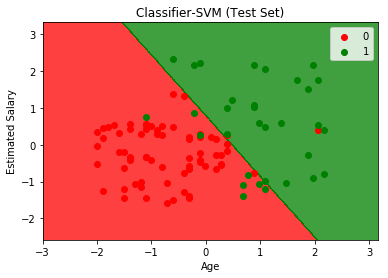

In [30]:
plot_regions(x_test, y_test, 'Classifier-SVM (Test Set)')

### Conclusion
Here we can see that the SVM with linear kernel is indeed a very powerful model for predicting linear seperable models accurately.